<a href="https://colab.research.google.com/github/JavierFernandezAcin/JavierFernandezAcin-DataScience-GenAI-Submissions/blob/main/Apple_Algo_decision_tree_and_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import io
import csv

df_apple_1 = pd.read_csv('Apple Stock Price.csv')

# Read the problematic CSV as a single column without a header initially
df_temp = pd.read_csv('Apple Stock Price 2.csv', header=None, engine='python')

# Use io.StringIO and csv.reader to correctly parse the header and data rows
# Extract the header string from the first row of the temporary DataFrame
header_str = df_temp.iloc[0, 0]
f_header = io.StringIO(header_str)
reader_header = csv.reader(f_header, delimiter=',', quotechar='"')
columns = next(reader_header)

# Parse the data rows (from the second row onwards)
data_rows = []
for row_str in df_temp.iloc[1:, 0]:
    f_data = io.StringIO(row_str)
    reader_data = csv.reader(f_data, delimiter=',', quotechar='"')
    try:
        data_rows.append(next(reader_data))
    except StopIteration:
        # Handle potential empty lines
        continue

df_apple_2 = pd.DataFrame(data_rows, columns=columns)

print("Successfully read 'Apple Stock Price.csv' into df_apple_1.")
print("Successfully read 'Apple Stock Price 2.csv' into df_apple_2.")

Successfully read 'Apple Stock Price.csv' into df_apple_1.
Successfully read 'Apple Stock Price 2.csv' into df_apple_2.


In [10]:
print(df_apple_1.head())
print(df_apple_2.head())

         Date  Price  Open  High   Low     Vol. Change %
0  09/22/2000   0.93  0.90  0.94  0.89  726.70M   -7.94%
1  09/21/2000   1.01  1.04  1.06  0.99  510.49M   -7.14%
2  09/20/2000   1.09  1.06  1.10  1.05  227.39M    1.85%
3  09/19/2000   1.07  1.07  1.08  1.05  272.08M   -1.18%
4  09/18/2000   1.08  0.99  1.08  0.98  424.54M    9.82%
         Date   Price    Open    High     Low     Vol. Change %
0  11/13/2020  119.26  119.44  119.67  117.87   81.69M    0.04%
1  11/12/2020  119.21  119.62  120.53  118.57  103.35M   -0.23%
2  11/11/2020  119.49  117.19  119.63  116.44  112.29M    3.04%
3  11/10/2020  115.97  115.55  117.59  114.13  138.02M   -0.30%
4  11/09/2020  116.32  120.50  121.99  116.05  154.52M   -2.00%


In [12]:
df_apple_combined = pd.concat([df_apple_1, df_apple_2], ignore_index=True)
print("Head of the combined DataFrame:")
print(df_apple_combined.head())
print("\nShape of the combined DataFrame:", df_apple_combined.shape)

Head of the combined DataFrame:
         Date Price  Open  High   Low     Vol. Change %
0  09/22/2000  0.93   0.9  0.94  0.89  726.70M   -7.94%
1  09/21/2000  1.01  1.04  1.06  0.99  510.49M   -7.14%
2  09/20/2000  1.09  1.06   1.1  1.05  227.39M    1.85%
3  09/19/2000  1.07  1.07  1.08  1.05  272.08M   -1.18%
4  09/18/2000  1.08  0.99  1.08  0.98  424.54M    9.82%

Shape of the combined DataFrame: (9999, 7)


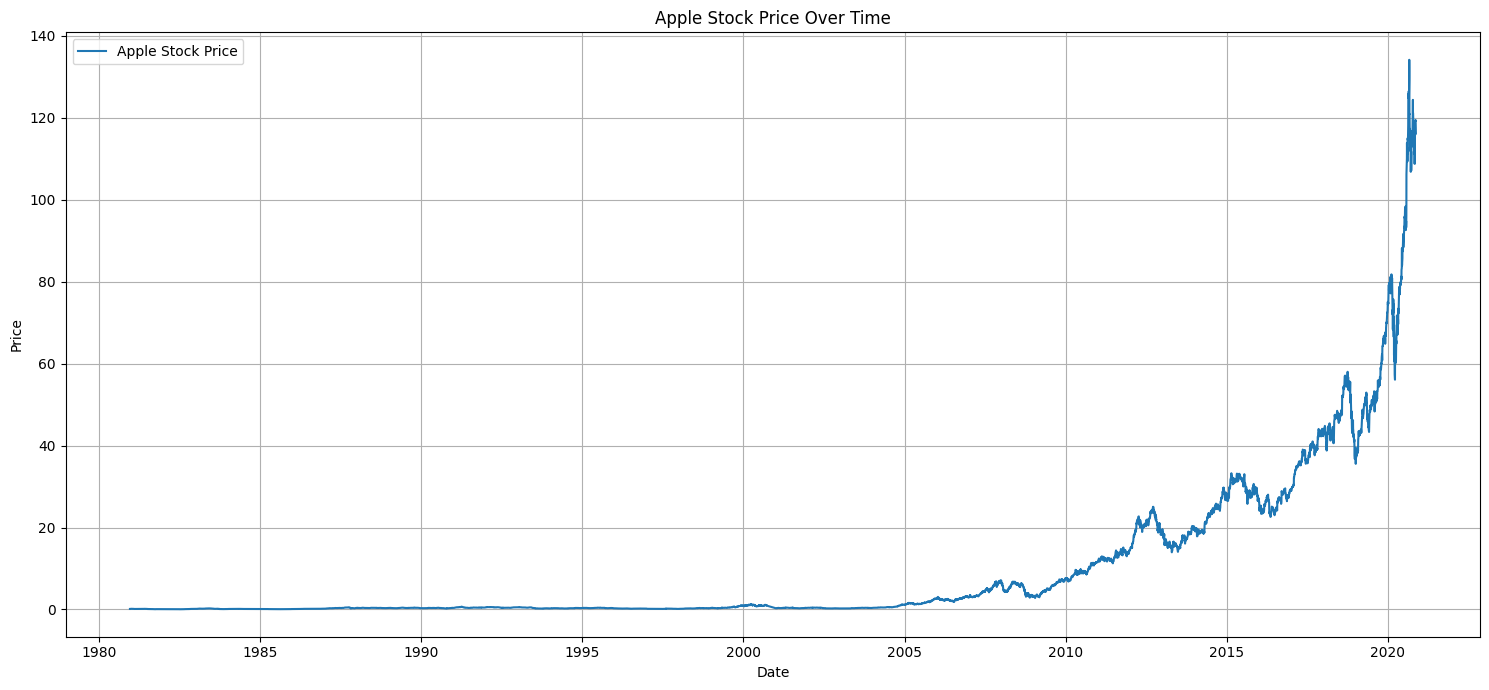

In [13]:
import matplotlib.pyplot as plt

# Ensure 'Date' column is in datetime format for proper plotting
df_apple_combined['Date'] = pd.to_datetime(df_apple_combined['Date'])

# Sort the DataFrame by Date to ensure the line plot is continuous
df_apple_combined_sorted = df_apple_combined.sort_values(by='Date')

plt.figure(figsize=(15, 7))
plt.plot(df_apple_combined_sorted['Date'], df_apple_combined_sorted['Price'], label='Apple Stock Price')
plt.title('Apple Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

This graph visualizes the combined Apple stock prices over time, showing the trend of the stock price from the earliest date to the latest in the dataset.

Prompt: Run a decision tree with 10 layers to predict the stock price change over the following month (1 month holding period.) For testing use data between 1995-2000 and 2015-2020. Do 2 different decision trees for each backtesting. Train the first one with data from 1980-1995 and the second one with data 1980-2015. Place sell and buy orders and visualize in a graph when they are places as well as the cumulative PnL. Plot also each of the decision trees.


# Task
"Prepare the data for modeling by converting 'Price', 'Open', 'High', 'Low' to numeric types, cleaning 'Vol.' and 'Change %' columns by removing non-numeric characters and converting them to numeric, and then calculating the target variable for monthly stock price direction."

## Prepare Data

### Subtask:
Ensure the 'Date' column is in datetime format, sort the DataFrame by date, and convert all relevant columns (Price, Open, High, Low, Vol., Change %) to numeric types. Handle any non-numeric characters like 'M' in 'Vol.' and '%' in 'Change %'. Also, calculate the target variable: the direction of the stock price change over the next month (1 for increase, 0 for decrease/no change).


**Reasoning**:
The first step is to convert the 'Price', 'Open', 'High', and 'Low' columns to a numeric (float) type, as they represent monetary values.



In [14]:
cols_to_numeric = ['Price', 'Open', 'High', 'Low']
for col in cols_to_numeric:
    df_apple_combined_sorted[col] = pd.to_numeric(df_apple_combined_sorted[col])

print("Converted 'Price', 'Open', 'High', 'Low' to numeric type.")
print(df_apple_combined_sorted[cols_to_numeric].head())

Converted 'Price', 'Open', 'High', 'Low' to numeric type.
      Price  Open  High   Low
4998   0.12  0.12  0.12  0.12
4997   0.11  0.11  0.11  0.11
4996   0.12  0.12  0.12  0.12
4995   0.12  0.12  0.12  0.12
4994   0.13  0.13  0.13  0.13


**Reasoning**:
The next step is to clean the 'Vol.' column by removing the 'M' character, converting it to numeric, and multiplying by 1,000,000 to get the actual volume, as specified in the instructions.



In [15]:
df_apple_combined_sorted['Vol.'] = df_apple_combined_sorted['Vol.'].astype(str).str.replace('M', '').astype(float) * 1_000_000
print("Cleaned and converted 'Vol.' column to numeric type (actual volume).")
print(df_apple_combined_sorted['Vol.'].head())

ValueError: could not convert string to float: '2.83B'

**Reasoning**:
The previous attempt to clean the 'Vol.' column failed because it only handled 'M' for millions but encountered 'B' for billions. I need to update the cleaning logic to also remove 'B' and multiply by 1,000,000,000 for those values, and also consider 'K' for thousands. I will create a function to handle these conversions to ensure all volume values are correctly numeric.



In [16]:
def clean_volume(vol_str):
    vol_str = str(vol_str).replace(',', '') # Remove commas
    if 'M' in vol_str:
        return float(vol_str.replace('M', '')) * 1_000_000
    elif 'B' in vol_str:
        return float(vol_str.replace('B', '')) * 1_000_000_000
    elif 'K' in vol_str:
        return float(vol_str.replace('K', '')) * 1_000
    else:
        return float(vol_str)

df_apple_combined_sorted['Vol.'] = df_apple_combined_sorted['Vol.'].apply(clean_volume)
print("Cleaned and converted 'Vol.' column to numeric type (actual volume).")
print(df_apple_combined_sorted['Vol.'].head())

Cleaned and converted 'Vol.' column to numeric type (actual volume).
4998    175880000.0
4997    105730000.0
4996     86440000.0
4995     73450000.0
4994     48630000.0
Name: Vol., dtype: float64


**Reasoning**:
Now that the 'Vol.' column is correctly cleaned and converted to numeric, the next step is to clean the 'Change %' column as per the instructions. This involves removing the '%' character, converting it to a numeric (float) type, and then dividing by 100 to express it as a decimal percentage.



In [17]:
df_apple_combined_sorted['Change %'] = df_apple_combined_sorted['Change %'].str.replace('%', '').astype(float) / 100
print("Cleaned and converted 'Change %' column to numeric type (decimal).")
print(df_apple_combined_sorted['Change %'].head())

Cleaned and converted 'Change %' column to numeric type (decimal).
4998   -0.0522
4997   -0.0734
4996    0.0000
4995    0.0000
4994    0.0610
Name: Change %, dtype: float64


**Reasoning**:
All columns have been cleaned and converted to their appropriate numeric types. Now, I need to calculate the target variable, 'Monthly_Price_Direction', by comparing the current day's price with the price approximately 20 trading days (one month) later. I will use the `shift` function for this and handle any resulting NaN values.



In [18]:
df_apple_combined_sorted['Price_Next_Month'] = df_apple_combined_sorted['Price'].shift(-20)
df_apple_combined_sorted['Monthly_Price_Direction'] = (df_apple_combined_sorted['Price_Next_Month'] > df_apple_combined_sorted['Price']).astype(int)
df_apple_combined_sorted.dropna(subset=['Monthly_Price_Direction'], inplace=True)
print("Calculated 'Monthly_Price_Direction' and handled NaN values.")
print(df_apple_combined_sorted[['Date', 'Price', 'Price_Next_Month', 'Monthly_Price_Direction']].tail())

Calculated 'Monthly_Price_Direction' and handled NaN values.
           Date   Price  Price_Next_Month  Monthly_Price_Direction
5003 2020-11-09  116.32               NaN                        0
5002 2020-11-10  115.97               NaN                        0
5001 2020-11-11  119.49               NaN                        0
5000 2020-11-12  119.21               NaN                        0
4999 2020-11-13  119.26               NaN                        0


**Reasoning**:
The previous step for calculating 'Monthly_Price_Direction' did not correctly handle NaN values because the `dropna` was applied to `Monthly_Price_Direction` which was already set to 0 for the rows where `Price_Next_Month` was NaN. To properly remove these rows, I need to drop NaNs based on the `Price_Next_Month` column itself, after it has been created but before the final `Monthly_Price_Direction` calculation.



In [19]:
df_apple_combined_sorted['Price_Next_Month'] = df_apple_combined_sorted['Price'].shift(-20)
df_apple_combined_sorted.dropna(subset=['Price_Next_Month'], inplace=True)
df_apple_combined_sorted['Monthly_Price_Direction'] = (df_apple_combined_sorted['Price_Next_Month'] > df_apple_combined_sorted['Price']).astype(int)

print("Recalculated 'Monthly_Price_Direction' and correctly handled NaN values.")
print(df_apple_combined_sorted[['Date', 'Price', 'Price_Next_Month', 'Monthly_Price_Direction']].tail())

Recalculated 'Monthly_Price_Direction' and correctly handled NaN values.
           Date   Price  Price_Next_Month  Monthly_Price_Direction
5023 2020-10-12  124.40            116.32                        0
5022 2020-10-13  121.10            115.97                        0
5021 2020-10-14  121.19            119.49                        0
5020 2020-10-15  120.71            119.21                        0
5019 2020-10-16  119.02            119.26                        1


## Scenario 1: Train 1980-1995, Test 1995-2000

### Subtask:
Split the preprocessed data into a training set (1980-1995) and a testing set (1995-2000). Train a Decision Tree Classifier with a maximum depth of 10 on the training data. Use this trained model to make predictions on the testing data.


**Reasoning**:
The first step is to filter the `df_apple_combined_sorted` DataFrame to create `df_train_1` which includes data from '1980-01-01' to '1995-12-31', as specified in the instructions for the training set.



In [20]:
df_train_1 = df_apple_combined_sorted[(df_apple_combined_sorted['Date'] >= '1980-01-01') & (df_apple_combined_sorted['Date'] <= '1995-12-31')]
print("df_train_1 created with shape:", df_train_1.shape)
print("df_train_1 head:\n", df_train_1.head())

df_train_1 created with shape: (3804, 9)
df_train_1 head:
            Date  Price  Open  High   Low         Vol.  Change %  \
4998 1980-12-15   0.12  0.12  0.12  0.12  175880000.0   -0.0522   
4997 1980-12-16   0.11  0.11  0.11  0.11  105730000.0   -0.0734   
4996 1980-12-17   0.12  0.12  0.12  0.12   86440000.0    0.0000   
4995 1980-12-18   0.12  0.12  0.12  0.12   73450000.0    0.0000   
4994 1980-12-19   0.13  0.13  0.13  0.13   48630000.0    0.0610   

      Price_Next_Month  Monthly_Price_Direction  
4998              0.14                        1  
4997              0.14                        1  
4996              0.14                        1  
4995              0.15                        1  
4994              0.14                        1  


**Reasoning**:
Now, I will filter the `df_apple_combined_sorted` DataFrame to create `df_test_1`, which includes data from '1995-01-01' to '2000-12-31', as specified for the testing set.



In [21]:
df_test_1 = df_apple_combined_sorted[(df_apple_combined_sorted['Date'] >= '1995-01-01') & (df_apple_combined_sorted['Date'] <= '2000-12-31')]
print("df_test_1 created with shape:", df_test_1.shape)
print("df_test_1 head:\n", df_test_1.head())

df_test_1 created with shape: (1447, 9)
df_test_1 head:
            Date  Price  Open  High   Low          Vol.  Change %  \
1446 1995-01-03   0.34  0.35  0.35  0.34  1.038700e+08   -0.0160   
1445 1995-01-04   0.35  0.34  0.35  0.34  1.586800e+08    0.0261   
1444 1995-01-05   0.35  0.35  0.35  0.35  7.364000e+07    0.0000   
1443 1995-01-06   0.38  0.37  0.39  0.37  1.080000e+09    0.0804   
1442 1995-01-09   0.37  0.37  0.37  0.37  2.740900e+08   -0.0190   

      Price_Next_Month  Monthly_Price_Direction  
1446              0.36                        1  
1445              0.36                        1  
1444              0.37                        1  
1443              0.36                        0  
1442              0.36                        0  


**Reasoning**:
Now that the training and testing dataframes are created, I will define the feature set (X) and the target variable (y) for both `df_train_1` and `df_test_1`. The features will include 'Price', 'Open', 'High', 'Low', 'Vol.', and 'Change %', and the target will be 'Monthly_Price_Direction'.



In [22]:
features = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
X_train_1 = df_train_1[features]
y_train_1 = df_train_1['Monthly_Price_Direction']

X_test_1 = df_test_1[features]
y_test_1 = df_test_1['Monthly_Price_Direction']

print("Features (X_train_1) head:\n", X_train_1.head())
print("\nTarget (y_train_1) head:\n", y_train_1.head())
print("\nFeatures (X_test_1) head:\n", X_test_1.head())
print("\nTarget (y_test_1) head:\n", y_test_1.head())

Features (X_train_1) head:
       Price  Open  High   Low         Vol.  Change %
4998   0.12  0.12  0.12  0.12  175880000.0   -0.0522
4997   0.11  0.11  0.11  0.11  105730000.0   -0.0734
4996   0.12  0.12  0.12  0.12   86440000.0    0.0000
4995   0.12  0.12  0.12  0.12   73450000.0    0.0000
4994   0.13  0.13  0.13  0.13   48630000.0    0.0610

Target (y_train_1) head:
 4998    1
4997    1
4996    1
4995    1
4994    1
Name: Monthly_Price_Direction, dtype: int64

Features (X_test_1) head:
       Price  Open  High   Low          Vol.  Change %
1446   0.34  0.35  0.35  0.34  1.038700e+08   -0.0160
1445   0.35  0.34  0.35  0.34  1.586800e+08    0.0261
1444   0.35  0.35  0.35  0.35  7.364000e+07    0.0000
1443   0.38  0.37  0.39  0.37  1.080000e+09    0.0804
1442   0.37  0.37  0.37  0.37  2.740900e+08   -0.0190

Target (y_test_1) head:
 1446    1
1445    1
1444    1
1443    0
1442    0
Name: Monthly_Price_Direction, dtype: int64


**Reasoning**:
I will import the `DecisionTreeClassifier` from `sklearn.tree`, instantiate it with a `max_depth` of 10 and `random_state` of 42, and then train the model using the prepared training features (`X_train_1`) and target (`y_train_1`).



In [23]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the Decision Tree Classifier
dtc_model_1 = DecisionTreeClassifier(max_depth=10, random_state=42)

# Train the model
dtc_model_1.fit(X_train_1, y_train_1)

print("Decision Tree Classifier (dtc_model_1) trained successfully with max_depth=10.")

Decision Tree Classifier (dtc_model_1) trained successfully with max_depth=10.


**Reasoning**:
Now that the `dtc_model_1` has been trained, I will use it to make predictions on the testing features (`X_test_1`) as per the instructions, storing the results in `predictions_1`.



In [24]:
predictions_1 = dtc_model_1.predict(X_test_1)

print("Predictions on X_test_1 generated successfully.")
print("First 5 predictions:", predictions_1[:5])

Predictions on X_test_1 generated successfully.
First 5 predictions: [1 1 1 0 0]


## Backtest Strategy 1 & Visualize

### Subtask:
Implement a trading strategy based on the predictions from Decision Tree 1, calculate the cumulative Profit and Loss (PnL) over the testing period, and generate visualizations for buy/sell orders, cumulative PnL, and the trained Decision Tree 1.


**Reasoning**:
The first step is to create a copy of `df_test_1` to avoid modifying the original DataFrame and then add the `predictions_1` array as a new column named 'Predicted_Direction' to this copied DataFrame. This prepares the data for implementing the trading strategy.



In [25]:
df_test_1_copy = df_test_1.copy()
df_test_1_copy['Predicted_Direction'] = predictions_1

print("df_test_1_copy created with 'Predicted_Direction' column.")
print(df_test_1_copy.head())

df_test_1_copy created with 'Predicted_Direction' column.
           Date  Price  Open  High   Low          Vol.  Change %  \
1446 1995-01-03   0.34  0.35  0.35  0.34  1.038700e+08   -0.0160   
1445 1995-01-04   0.35  0.34  0.35  0.34  1.586800e+08    0.0261   
1444 1995-01-05   0.35  0.35  0.35  0.35  7.364000e+07    0.0000   
1443 1995-01-06   0.38  0.37  0.39  0.37  1.080000e+09    0.0804   
1442 1995-01-09   0.37  0.37  0.37  0.37  2.740900e+08   -0.0190   

      Price_Next_Month  Monthly_Price_Direction  Predicted_Direction  
1446              0.36                        1                    1  
1445              0.36                        1                    1  
1444              0.37                        1                    1  
1443              0.36                        0                    0  
1442              0.36                        0                    0  


**Reasoning**:
The next step is to calculate the daily returns based on the 'Price' column in the copied DataFrame. This will be used to determine the PnL of the trading strategy.



In [26]:
df_test_1_copy['Daily_Return'] = df_test_1_copy['Price'].pct_change().shift(-1)

print("Calculated 'Daily_Return' column.")
print(df_test_1_copy[['Date', 'Price', 'Daily_Return']].head())

Calculated 'Daily_Return' column.
           Date  Price  Daily_Return
1446 1995-01-03   0.34      0.029412
1445 1995-01-04   0.35      0.000000
1444 1995-01-05   0.35      0.085714
1443 1995-01-06   0.38     -0.026316
1442 1995-01-09   0.37      0.054054


**Reasoning**:
Now, I will implement the trading strategy by calculating the 'Strategy_Return' based on the 'Predicted_Direction'. If the model predicts an increase (1), the strategy's return will be the percentage change from the current price to the price 20 trading days later. Otherwise (0), the strategy's return will be 0.



In [27]:
df_test_1_copy['Strategy_Return'] = df_test_1_copy.apply(lambda row: (row['Price_Next_Month'] - row['Price']) / row['Price'] if row['Predicted_Direction'] == 1 else 0, axis=1)

print("Calculated 'Strategy_Return' column based on predicted direction.")
print(df_test_1_copy[['Date', 'Price', 'Price_Next_Month', 'Predicted_Direction', 'Strategy_Return']].head())

Calculated 'Strategy_Return' column based on predicted direction.
           Date  Price  Price_Next_Month  Predicted_Direction  Strategy_Return
1446 1995-01-03   0.34              0.36                    1         0.058824
1445 1995-01-04   0.35              0.36                    1         0.028571
1444 1995-01-05   0.35              0.37                    1         0.057143
1443 1995-01-06   0.38              0.36                    0         0.000000
1442 1995-01-09   0.37              0.36                    0         0.000000


**Reasoning**:
Now, I will calculate the daily Profit and Loss (PnL) for the strategy. Assuming an initial investment of 1 unit of stock, the daily PnL will be the 'Strategy_Return' multiplied by the initial investment.



In [28]:
initial_investment = 1 # Assuming 1 unit of stock or $1 initial investment
df_test_1_copy['Daily_PnL'] = df_test_1_copy['Strategy_Return'] * initial_investment

print("Calculated 'Daily_PnL' column.")
print(df_test_1_copy[['Date', 'Price', 'Strategy_Return', 'Daily_PnL']].head())

Calculated 'Daily_PnL' column.
           Date  Price  Strategy_Return  Daily_PnL
1446 1995-01-03   0.34         0.058824   0.058824
1445 1995-01-04   0.35         0.028571   0.028571
1444 1995-01-05   0.35         0.057143   0.057143
1443 1995-01-06   0.38         0.000000   0.000000
1442 1995-01-09   0.37         0.000000   0.000000


**Reasoning**:
Now, I will compute the cumulative PnL by taking the cumulative sum of the 'Daily_PnL' column. This will show the overall performance of the trading strategy over time.



In [29]:
df_test_1_copy['Cumulative_PnL'] = df_test_1_copy['Daily_PnL'].cumsum()

print("Calculated 'Cumulative_PnL' column.")
print(df_test_1_copy[['Date', 'Daily_PnL', 'Cumulative_PnL']].head())

Calculated 'Cumulative_PnL' column.
           Date  Daily_PnL  Cumulative_PnL
1446 1995-01-03   0.058824        0.058824
1445 1995-01-04   0.028571        0.087395
1444 1995-01-05   0.057143        0.144538
1443 1995-01-06   0.000000        0.144538
1442 1995-01-09   0.000000        0.144538


**Reasoning**:
Now, I will generate a line plot showing the stock price over the test period and overlay buy and sell signals based on the 'Predicted_Direction' column. This will visually represent when the strategy would initiate a trade.



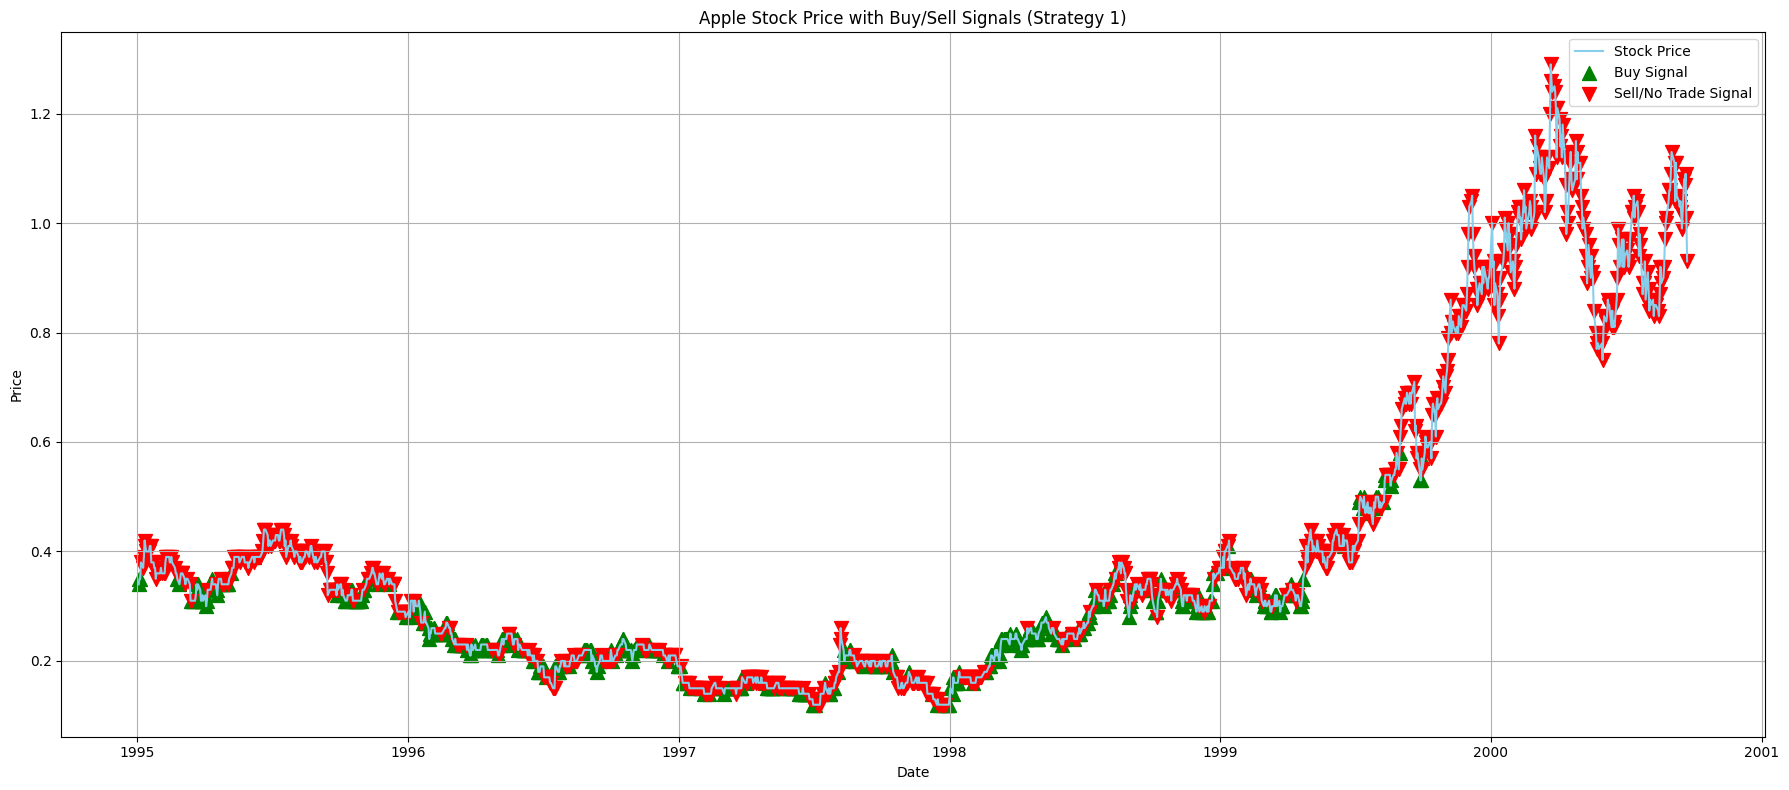

Generated plot of stock price with buy/sell signals.


In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.plot(df_test_1_copy['Date'], df_test_1_copy['Price'], label='Stock Price', color='skyblue')

# Overlay buy signals (Predicted_Direction == 1)
buy_signals = df_test_1_copy[df_test_1_copy['Predicted_Direction'] == 1]
plt.scatter(buy_signals['Date'], buy_signals['Price'], marker='^', color='green', s=100, label='Buy Signal')

# Overlay sell signals (Predicted_Direction == 0)
sell_signals = df_test_1_copy[df_test_1_copy['Predicted_Direction'] == 0]
plt.scatter(sell_signals['Date'], sell_signals['Price'], marker='v', color='red', s=100, label='Sell/No Trade Signal')

plt.title('Apple Stock Price with Buy/Sell Signals (Strategy 1)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Generated plot of stock price with buy/sell signals.")

**Reasoning**:
Now, I will create a separate line plot to visualize the 'Cumulative_PnL' over the testing period, as requested in the instructions. This will show the performance of the trading strategy over time.



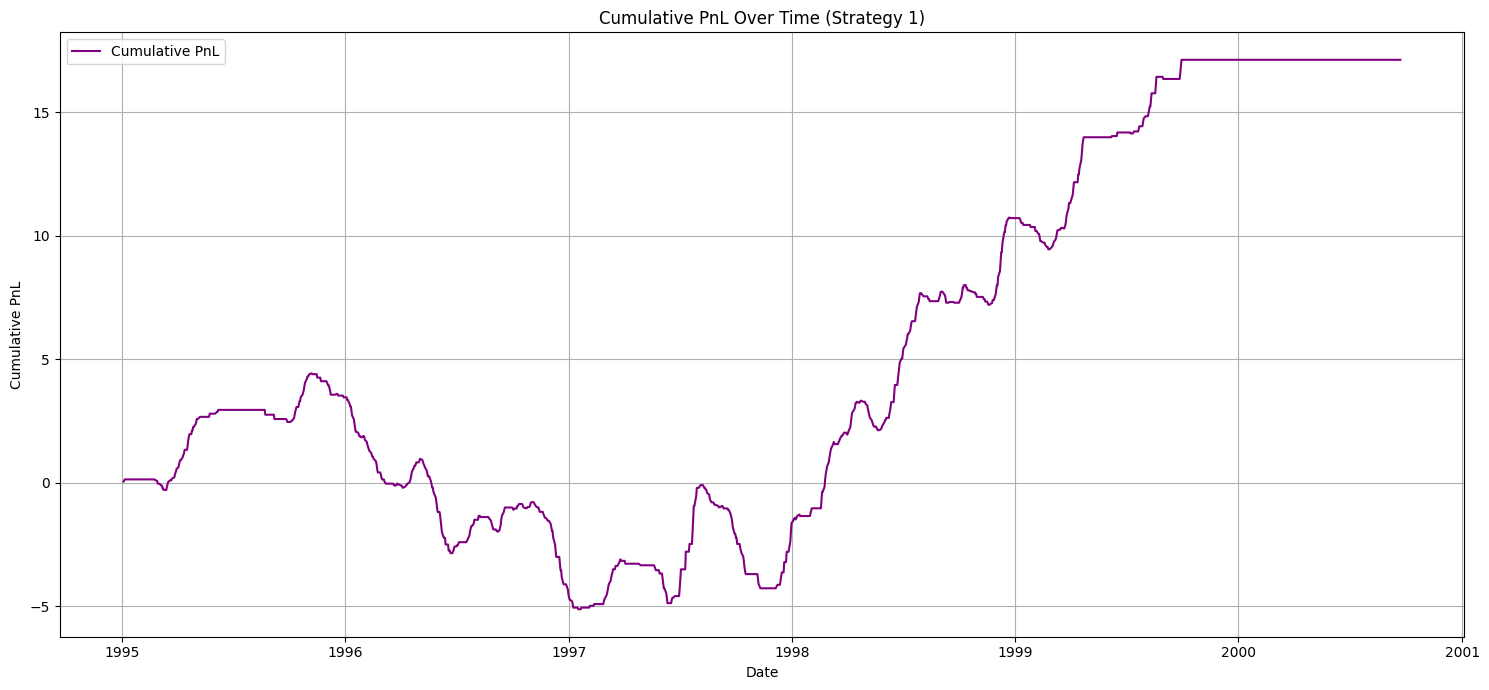

Generated plot of cumulative PnL.


In [31]:
plt.figure(figsize=(15, 7))
plt.plot(df_test_1_copy['Date'], df_test_1_copy['Cumulative_PnL'], label='Cumulative PnL', color='purple')
plt.title('Cumulative PnL Over Time (Strategy 1)')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("Generated plot of cumulative PnL.")

**Reasoning**:
Now, I will visualize the trained Decision Tree `dtc_model_1` using `sklearn.tree.plot_tree` as requested. To ensure readability, I will set a large figure size and include feature names and class names.



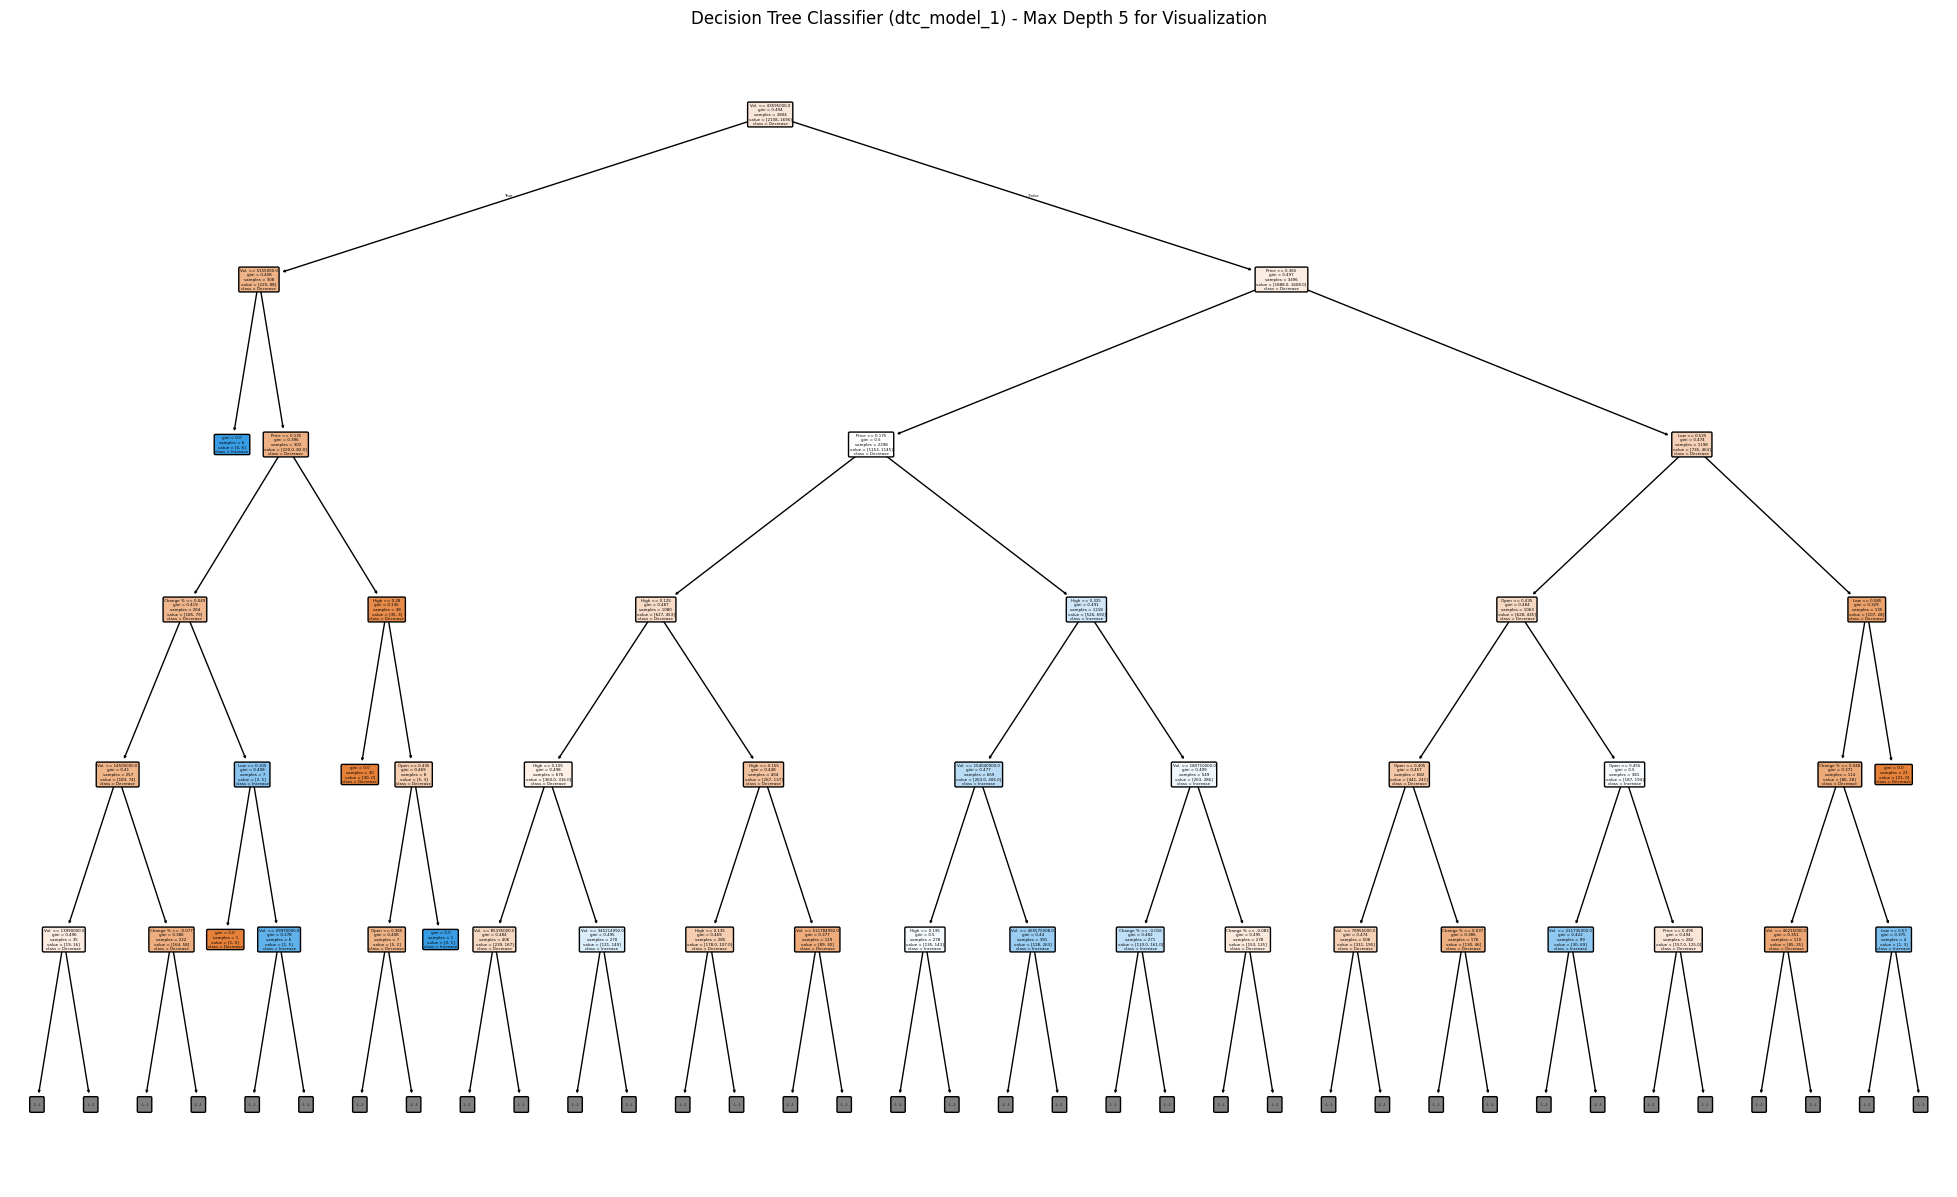

Generated visualization of Decision Tree dtc_model_1.


In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 15))
plot_tree(dtc_model_1, filled=True, feature_names=features, class_names=['Decrease', 'Increase'], rounded=True, max_depth=5)
plt.title('Decision Tree Classifier (dtc_model_1) - Max Depth 5 for Visualization')
plt.show()

print("Generated visualization of Decision Tree dtc_model_1.")

## Scenario 2: Train 1980-2015, Test 2015-2020

### Subtask:
Split the preprocessed data into a training set (1980-2015) and a testing set (2015-2020). Train a second Decision Tree Classifier with a maximum depth of 10 on this training data. Use this model to make predictions on its corresponding testing data.


**Reasoning**:
The first step is to filter the `df_apple_combined_sorted` DataFrame to create `df_train_2`, including data from '1980-01-01' to '2015-12-31', as specified in the instructions for the training set.



In [33]:
df_train_2 = df_apple_combined_sorted[(df_apple_combined_sorted['Date'] >= '1980-01-01') & (df_apple_combined_sorted['Date'] <= '2015-12-31')]
print("df_train_2 created with shape:", df_train_2.shape)
print("df_train_2 head:\n", df_train_2.head())

df_train_2 created with shape: (8772, 9)
df_train_2 head:
            Date  Price  Open  High   Low         Vol.  Change %  \
4998 1980-12-15   0.12  0.12  0.12  0.12  175880000.0   -0.0522   
4997 1980-12-16   0.11  0.11  0.11  0.11  105730000.0   -0.0734   
4996 1980-12-17   0.12  0.12  0.12  0.12   86440000.0    0.0000   
4995 1980-12-18   0.12  0.12  0.12  0.12   73450000.0    0.0000   
4994 1980-12-19   0.13  0.13  0.13  0.13   48630000.0    0.0610   

      Price_Next_Month  Monthly_Price_Direction  
4998              0.14                        1  
4997              0.14                        1  
4996              0.14                        1  
4995              0.15                        1  
4994              0.14                        1  


**Reasoning**:
Now, I will filter the `df_apple_combined_sorted` DataFrame to create `df_test_2`, which includes data from '2015-01-01' to '2020-12-31', as specified for the testing set.



In [34]:
df_test_2 = df_apple_combined_sorted[(df_apple_combined_sorted['Date'] >= '2015-01-01') & (df_apple_combined_sorted['Date'] <= '2020-12-31')]
print("df_test_2 created with shape:", df_test_2.shape)
print("df_test_2 head:\n", df_test_2.head())

df_test_2 created with shape: (1459, 9)
df_test_2 head:
            Date  Price   Open   High    Low         Vol.  Change %  \
6477 2015-01-02  27.33  27.85  27.86  26.84  212820000.0   -0.0095   
6476 2015-01-05  26.56  27.07  27.16  26.35  257140000.0   -0.0282   
6475 2015-01-06  26.57  26.64  26.86  26.16  263190000.0    0.0000   
6474 2015-01-07  26.94  26.80  27.05  26.67  160420000.0    0.0140   
6473 2015-01-08  27.97  27.31  28.04  27.17  237460000.0    0.0384   

      Price_Next_Month  Monthly_Price_Direction  
6477             29.66                        1  
6476             29.66                        1  
6475             29.89                        1  
6474             29.99                        1  
6473             29.73                        1  


**Reasoning**:
Now that the training and testing dataframes for the second scenario are created, I will define the feature set (X) and the target variable (y) for both `df_train_2` and `df_test_2`. The features will include 'Price', 'Open', 'High', 'Low', 'Vol.', and 'Change %', and the target will be 'Monthly_Price_Direction'.



In [35]:
features = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
X_train_2 = df_train_2[features]
y_train_2 = df_train_2['Monthly_Price_Direction']

X_test_2 = df_test_2[features]
y_test_2 = df_test_2['Monthly_Price_Direction']

print("Features (X_train_2) head:\n", X_train_2.head())
print("\nTarget (y_train_2) head:\n", y_train_2.head())
print("\nFeatures (X_test_2) head:\n", X_test_2.head())
print("\nTarget (y_test_2) head:\n", y_test_2.head())

Features (X_train_2) head:
       Price  Open  High   Low         Vol.  Change %
4998   0.12  0.12  0.12  0.12  175880000.0   -0.0522
4997   0.11  0.11  0.11  0.11  105730000.0   -0.0734
4996   0.12  0.12  0.12  0.12   86440000.0    0.0000
4995   0.12  0.12  0.12  0.12   73450000.0    0.0000
4994   0.13  0.13  0.13  0.13   48630000.0    0.0610

Target (y_train_2) head:
 4998    1
4997    1
4996    1
4995    1
4994    1
Name: Monthly_Price_Direction, dtype: int64

Features (X_test_2) head:
       Price   Open   High    Low         Vol.  Change %
6477  27.33  27.85  27.86  26.84  212820000.0   -0.0095
6476  26.56  27.07  27.16  26.35  257140000.0   -0.0282
6475  26.57  26.64  26.86  26.16  263190000.0    0.0000
6474  26.94  26.80  27.05  26.67  160420000.0    0.0140
6473  27.97  27.31  28.04  27.17  237460000.0    0.0384

Target (y_test_2) head:
 6477    1
6476    1
6475    1
6474    1
6473    1
Name: Monthly_Price_Direction, dtype: int64


**Reasoning**:
Now that the features and target variables for the second training set (`X_train_2`, `y_train_2`) are defined, I will import the `DecisionTreeClassifier` and instantiate a new `DecisionTreeClassifier` object named `dtc_model_2` with `max_depth=10` and `random_state=42`. Following this, I will train `dtc_model_2` using `X_train_2` and `y_train_2` as specified in the instructions.



In [36]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the Decision Tree Classifier for the second scenario
dtc_model_2 = DecisionTreeClassifier(max_depth=10, random_state=42)

# Train the model
dtc_model_2.fit(X_train_2, y_train_2)

print("Decision Tree Classifier (dtc_model_2) trained successfully with max_depth=10.")

Decision Tree Classifier (dtc_model_2) trained successfully with max_depth=10.


**Reasoning**:
Now that `dtc_model_2` has been trained, I will use it to make predictions on the testing features (`X_test_2`) as per the instructions, storing the results in `predictions_2`.



In [37]:
predictions_2 = dtc_model_2.predict(X_test_2)

print("Predictions on X_test_2 generated successfully.")
print("First 5 predictions:", predictions_2[:5])

Predictions on X_test_2 generated successfully.
First 5 predictions: [1 1 1 1 1]


# Task
Create a copy of `df_test_2` and add the `predictions_2` array as a new column named 'Predicted_Direction' to this copied DataFrame. Then, calculate the 'Strategy_Return' based on the 'Predicted_Direction' in `df_test_2_copy`. If the model predicts an increase (1), the strategy's return will be the percentage change from the current price to the price 20 trading days later. Otherwise (0), the strategy's return will be 0. After that, calculate the 'Daily_PnL' by multiplying the 'Strategy_Return' by an initial investment (e.g., 1 unit) and compute the 'Cumulative_PnL' for the second scenario by taking the cumulative sum of the 'Daily_PnL' column in `df_test_2_copy`. Finally, generate a line plot showing the stock price from `df_test_2_copy` over the test period and overlay buy (Predicted_Direction == 1) and sell/no trade (Predicted_Direction == 0) signals. Add appropriate title, labels, and legend. Create a separate line plot to visualize the 'Cumulative_PnL' for Strategy 2 over its testing period. Add appropriate title, labels, and legend. And visualize the trained Decision Tree `dtc_model_2` using `sklearn.tree.plot_tree` with feature names, class names, and a suitable figure size for readability.

## Add Predictions to Test Data 2

### Subtask:
Create a copy of `df_test_2` and add the `predictions_2` array as a new column named 'Predicted_Direction' to this copied DataFrame. This prepares the data for implementing the trading strategy for the second scenario.


**Reasoning**:
The first step is to create a copy of `df_test_2` to avoid modifying the original DataFrame and then add the `predictions_2` array as a new column named 'Predicted_Direction' to this copied DataFrame. This prepares the data for implementing the trading strategy for the second scenario.



In [38]:
df_test_2_copy = df_test_2.copy()
df_test_2_copy['Predicted_Direction'] = predictions_2

print("df_test_2_copy created with 'Predicted_Direction' column.")
print(df_test_2_copy.head())

df_test_2_copy created with 'Predicted_Direction' column.
           Date  Price   Open   High    Low         Vol.  Change %  \
6477 2015-01-02  27.33  27.85  27.86  26.84  212820000.0   -0.0095   
6476 2015-01-05  26.56  27.07  27.16  26.35  257140000.0   -0.0282   
6475 2015-01-06  26.57  26.64  26.86  26.16  263190000.0    0.0000   
6474 2015-01-07  26.94  26.80  27.05  26.67  160420000.0    0.0140   
6473 2015-01-08  27.97  27.31  28.04  27.17  237460000.0    0.0384   

      Price_Next_Month  Monthly_Price_Direction  Predicted_Direction  
6477             29.66                        1                    1  
6476             29.66                        1                    1  
6475             29.89                        1                    1  
6474             29.99                        1                    1  
6473             29.73                        1                    1  


**Reasoning**:
Now, I will implement the trading strategy by calculating the 'Strategy_Return' based on the 'Predicted_Direction'. If the model predicts an increase (1), the strategy's return will be the percentage change from the current price to the price 20 trading days later. Otherwise (0), the strategy's return will be 0.



In [39]:
df_test_2_copy['Strategy_Return'] = df_test_2_copy.apply(lambda row: (row['Price_Next_Month'] - row['Price']) / row['Price'] if row['Predicted_Direction'] == 1 else 0, axis=1)

print("Calculated 'Strategy_Return' column based on predicted direction for df_test_2_copy.")
print(df_test_2_copy[['Date', 'Price', 'Price_Next_Month', 'Predicted_Direction', 'Strategy_Return']].head())

Calculated 'Strategy_Return' column based on predicted direction for df_test_2_copy.
           Date  Price  Price_Next_Month  Predicted_Direction  Strategy_Return
6477 2015-01-02  27.33             29.66                    1         0.085254
6476 2015-01-05  26.56             29.66                    1         0.116717
6475 2015-01-06  26.57             29.89                    1         0.124953
6474 2015-01-07  26.94             29.99                    1         0.113215
6473 2015-01-08  27.97             29.73                    1         0.062925


**Reasoning**:
Now, I will calculate the daily Profit and Loss (PnL) for the strategy. Assuming an initial investment of 1 unit of stock, the daily PnL will be the 'Strategy_Return' multiplied by the initial investment.



In [40]:
initial_investment = 1
df_test_2_copy['Daily_PnL'] = df_test_2_copy['Strategy_Return'] * initial_investment

print("Calculated 'Daily_PnL' column for df_test_2_copy.")
print(df_test_2_copy[['Date', 'Price', 'Strategy_Return', 'Daily_PnL']].head())

Calculated 'Daily_PnL' column for df_test_2_copy.
           Date  Price  Strategy_Return  Daily_PnL
6477 2015-01-02  27.33         0.085254   0.085254
6476 2015-01-05  26.56         0.116717   0.116717
6475 2015-01-06  26.57         0.124953   0.124953
6474 2015-01-07  26.94         0.113215   0.113215
6473 2015-01-08  27.97         0.062925   0.062925


**Reasoning**:
Now, I will compute the cumulative PnL for the second scenario by taking the cumulative sum of the 'Daily_PnL' column in `df_test_2_copy`. This will show the overall performance of the second trading strategy over time.



In [41]:
df_test_2_copy['Cumulative_PnL'] = df_test_2_copy['Daily_PnL'].cumsum()

print("Calculated 'Cumulative_PnL' column for df_test_2_copy.")
print(df_test_2_copy[['Date', 'Daily_PnL', 'Cumulative_PnL']].head())

Calculated 'Cumulative_PnL' column for df_test_2_copy.
           Date  Daily_PnL  Cumulative_PnL
6477 2015-01-02   0.085254        0.085254
6476 2015-01-05   0.116717        0.201971
6475 2015-01-06   0.124953        0.326924
6474 2015-01-07   0.113215        0.440139
6473 2015-01-08   0.062925        0.503063


**Reasoning**:
Now, I will generate a line plot showing the stock price over the test period for `df_test_2_copy` and overlay buy and sell signals based on the 'Predicted_Direction' column. This will visually represent when the second strategy would initiate a trade.



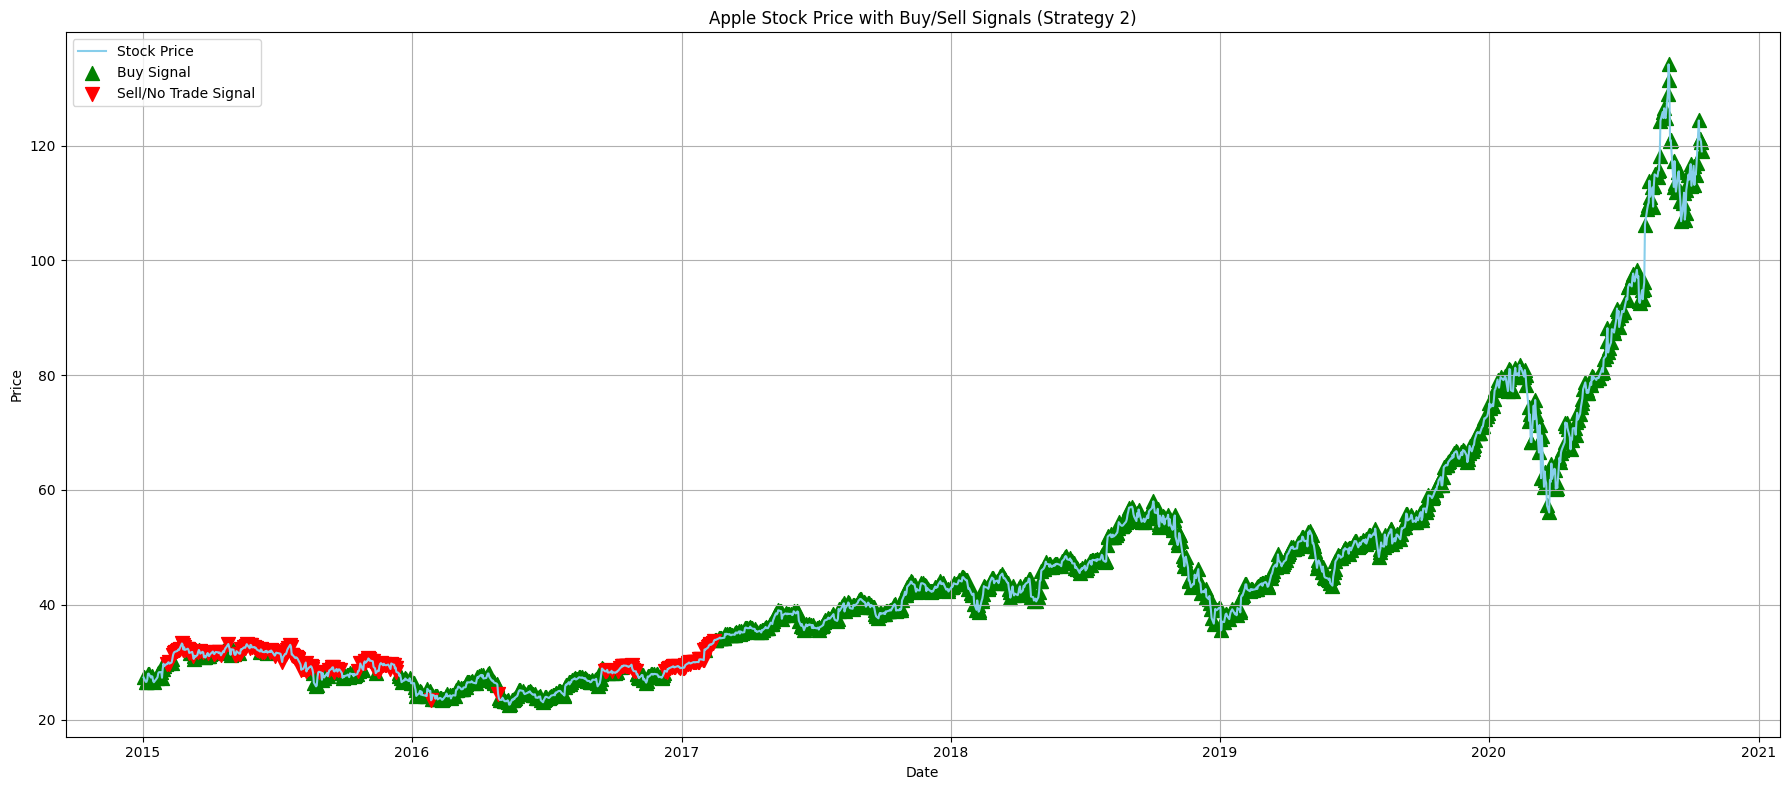

Generated plot of stock price with buy/sell signals for Strategy 2.


In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.plot(df_test_2_copy['Date'], df_test_2_copy['Price'], label='Stock Price', color='skyblue')

# Overlay buy signals (Predicted_Direction == 1)
buy_signals_2 = df_test_2_copy[df_test_2_copy['Predicted_Direction'] == 1]
plt.scatter(buy_signals_2['Date'], buy_signals_2['Price'], marker='^', color='green', s=100, label='Buy Signal')

# Overlay sell signals (Predicted_Direction == 0)
sell_signals_2 = df_test_2_copy[df_test_2_copy['Predicted_Direction'] == 0]
plt.scatter(sell_signals_2['Date'], sell_signals_2['Price'], marker='v', color='red', s=100, label='Sell/No Trade Signal')

plt.title('Apple Stock Price with Buy/Sell Signals (Strategy 2)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Generated plot of stock price with buy/sell signals for Strategy 2.")

**Reasoning**:
Now, I will create a separate line plot to visualize the 'Cumulative_PnL' for Strategy 2 over its testing period, as requested in the instructions. This will show the performance of the second trading strategy over time.



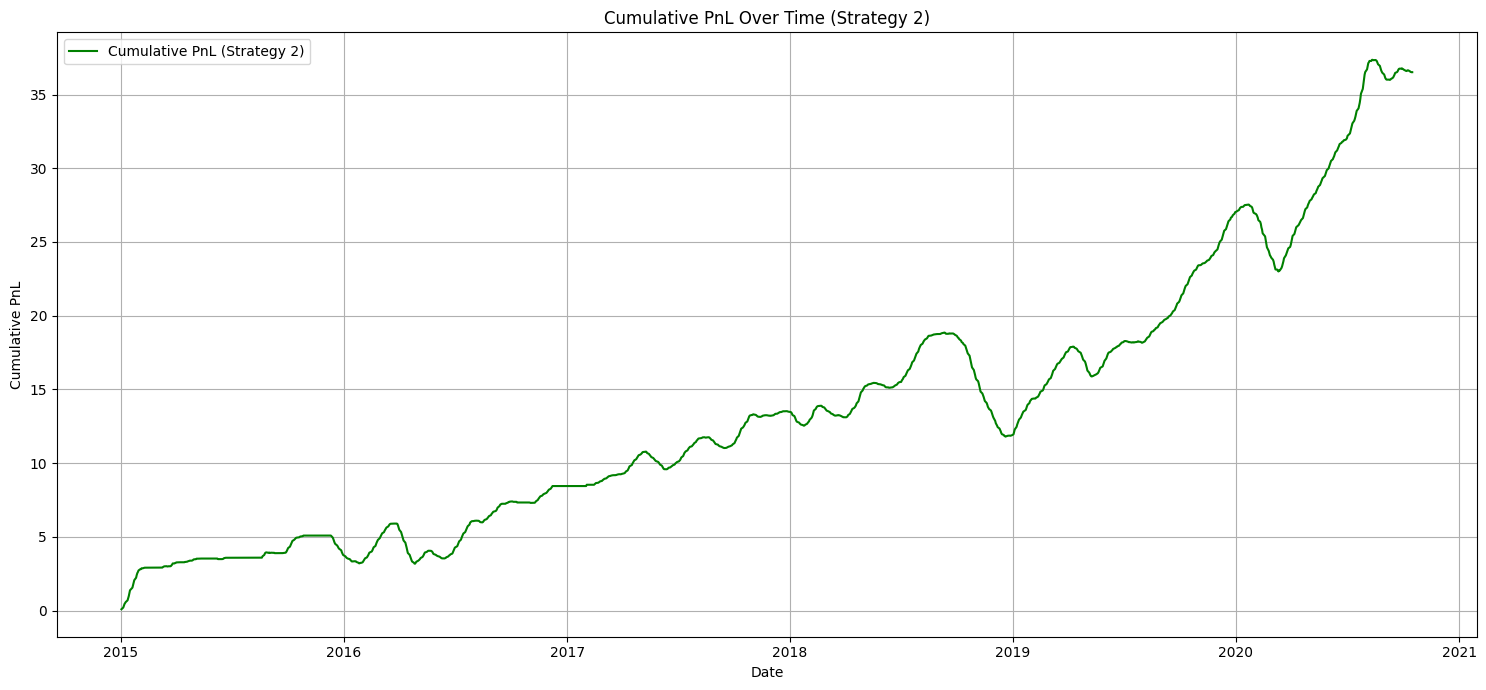

Generated plot of cumulative PnL for Strategy 2.


In [43]:
plt.figure(figsize=(15, 7))
plt.plot(df_test_2_copy['Date'], df_test_2_copy['Cumulative_PnL'], label='Cumulative PnL (Strategy 2)', color='green')
plt.title('Cumulative PnL Over Time (Strategy 2)')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("Generated plot of cumulative PnL for Strategy 2.")

**Reasoning**:
Now, I will visualize the trained Decision Tree `dtc_model_2` using `sklearn.tree.plot_tree` as requested. To ensure readability, I will set a large figure size and include feature names and class names.



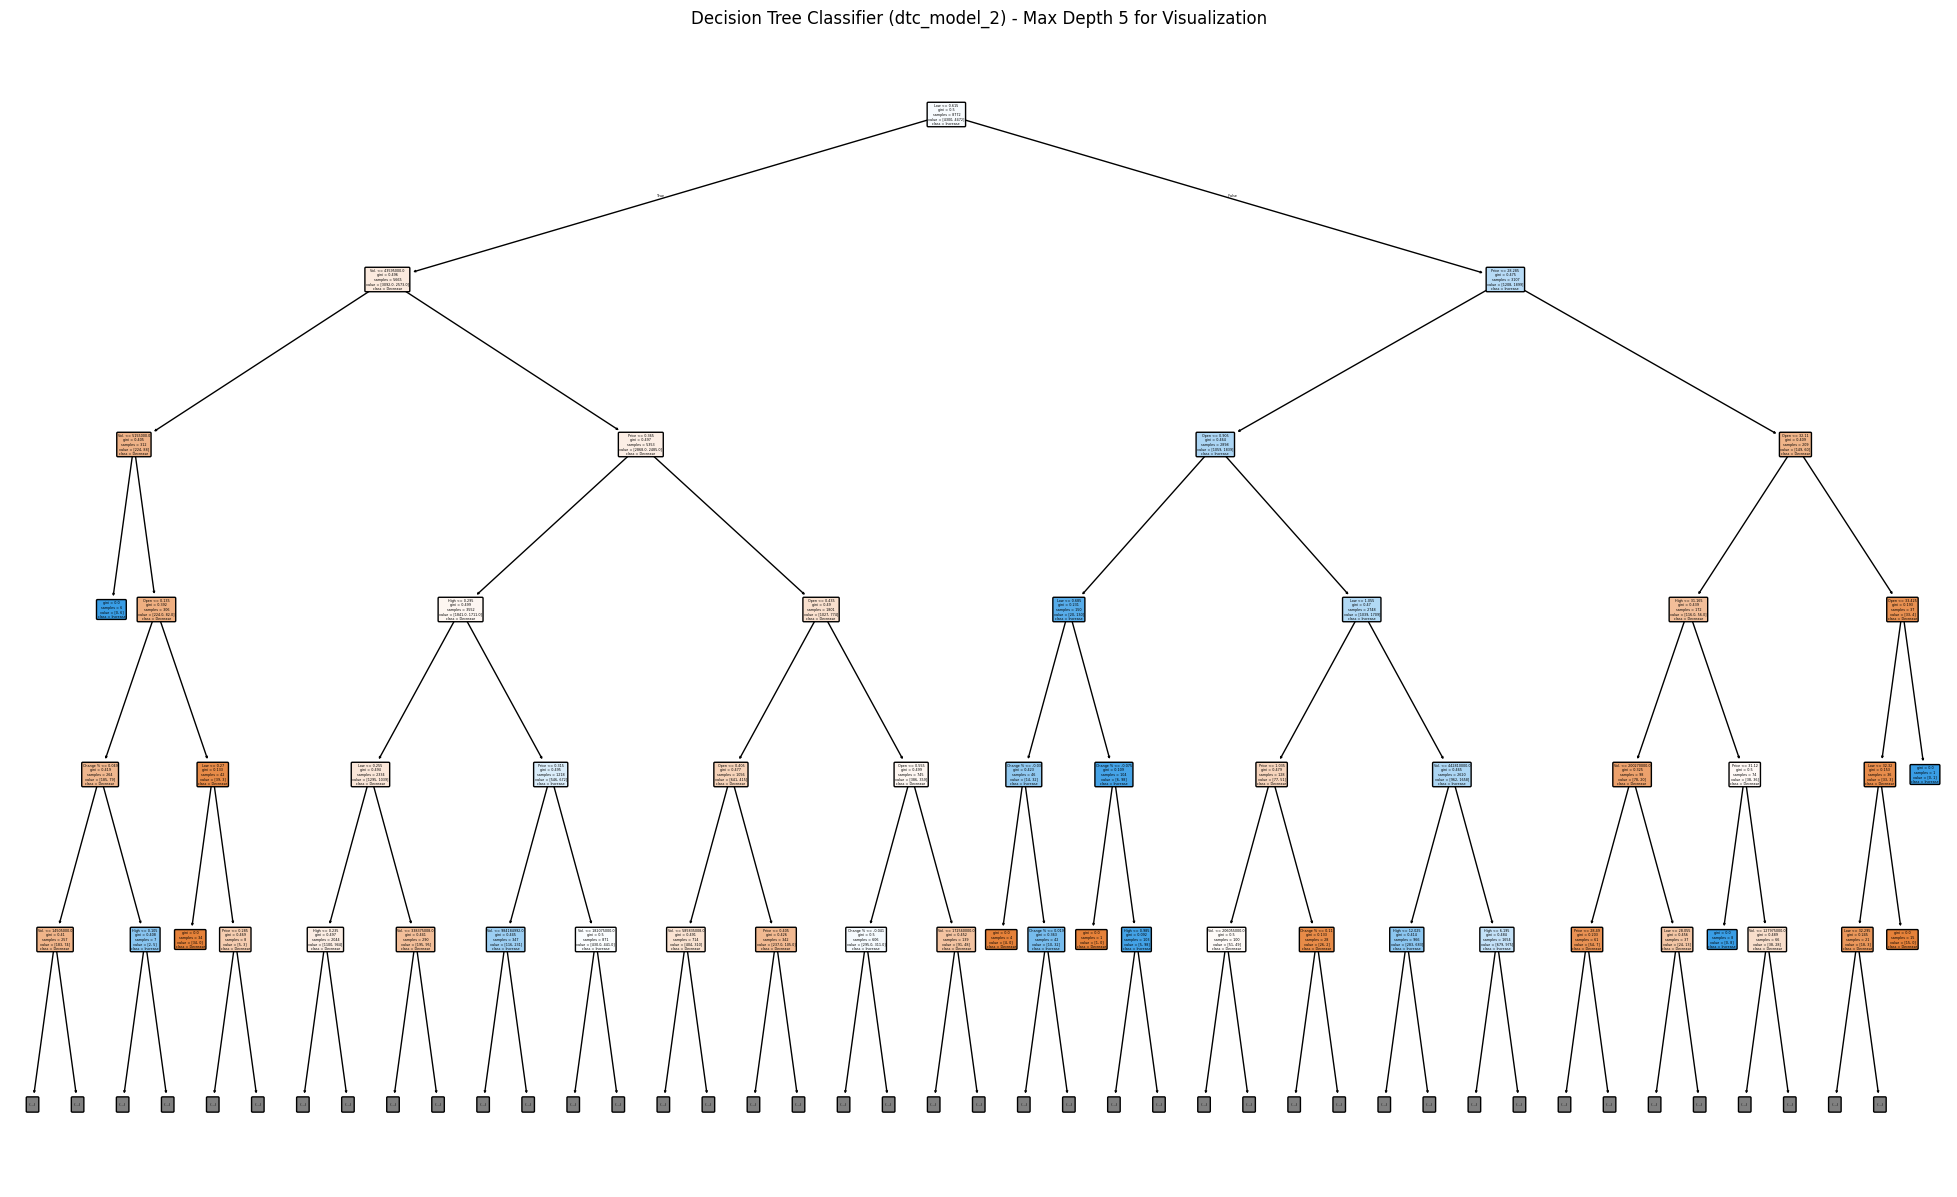

Generated visualization of Decision Tree dtc_model_2.


In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 15))
plot_tree(dtc_model_2, filled=True, feature_names=features, class_names=['Decrease', 'Increase'], rounded=True, max_depth=5)
plt.title('Decision Tree Classifier (dtc_model_2) - Max Depth 5 for Visualization')
plt.show()

print("Generated visualization of Decision Tree dtc_model_2.")

## Summary:

### Data Analysis Key Findings
*   A new DataFrame, `df_test_2_copy`, was successfully created, incorporating the model's `predictions_2` as a 'Predicted\_Direction' column.
*   'Strategy\_Return' was calculated: a positive return (percentage change from current price to `Price_Next_Month`) was recorded when 'Predicted\_Direction' was 1 (indicating an predicted increase), otherwise the return was 0.
*   'Daily\_PnL' was computed by multiplying the 'Strategy\_Return' by an initial investment of 1 unit, and the 'Cumulative\_PnL' was then derived as the cumulative sum of 'Daily\_PnL'.
*   Two line plots were generated:
    *   The first visualized the stock price over the test period, overlaying 'Buy Signal' (Predicted\_Direction = 1) and 'Sell/No Trade Signal' (Predicted\_Direction = 0) markers to illustrate the strategy's actions.
    *   The second plot displayed the 'Cumulative\_PnL' for Strategy 2 over its testing period, showing its performance trajectory.
*   The trained Decision Tree classifier (`dtc_model_2`) was successfully visualized using `sklearn.tree.plot_tree`, displaying the tree structure with feature and class names up to a maximum depth of 5.

### Insights or Next Steps
*   Further analysis could involve comparing the 'Cumulative\_PnL' of this strategy with a simple buy-and-hold strategy or other benchmark strategies to evaluate its true performance and risk-adjusted returns.
*   Given the visualization of the Decision Tree, it would be beneficial to analyze the most influential features at the top nodes of the tree to understand the key drivers of the model's predictions.


Now a random forest will be used and tecnical indicators such as the EMA and the RSI will be adde to the model


# Task
## Calculate Technical Indicators

### Subtask:
Calculate Exponential Moving Averages (EMA) for 20 and 50 periods for the 'Price' column in the `df_apple_combined_sorted` DataFrame. Ensure to handle any NaN values introduced by these calculations.

## Calculate Technical Indicators

### Subtask:
Calculate Exponential Moving Averages (EMA) for 20 and 50 periods for the 'Price' column in the `df_apple_combined_sorted` DataFrame. Ensure to handle any NaN values introduced by these calculations.


**Reasoning**:
The first instruction is to calculate the 20-period Exponential Moving Average (EMA) of the 'Price' column in `df_apple_combined_sorted` and store it in a new column named 'EMA_20'. I will use the `ewm` method with a `span` of 20.



In [45]:
df_apple_combined_sorted['EMA_20'] = df_apple_combined_sorted['Price'].ewm(span=20, adjust=False).mean()
print("Calculated 20-period EMA for 'Price' and stored in 'EMA_20'.")
print(df_apple_combined_sorted[['Date', 'Price', 'EMA_20']].head())

Calculated 20-period EMA for 'Price' and stored in 'EMA_20'.
           Date  Price    EMA_20
4998 1980-12-15   0.12  0.120000
4997 1980-12-16   0.11  0.119048
4996 1980-12-17   0.12  0.119138
4995 1980-12-18   0.12  0.119220
4994 1980-12-19   0.13  0.120247


**Reasoning**:
Now, I will calculate the 50-period Exponential Moving Average (EMA) of the 'Price' column in `df_apple_combined_sorted` and store it in a new column named 'EMA_50', using the `ewm` method with a `span` of 50.



In [46]:
df_apple_combined_sorted['EMA_50'] = df_apple_combined_sorted['Price'].ewm(span=50, adjust=False).mean()
print("Calculated 50-period EMA for 'Price' and stored in 'EMA_50'.")
print(df_apple_combined_sorted[['Date', 'Price', 'EMA_50']].head())

Calculated 50-period EMA for 'Price' and stored in 'EMA_50'.
           Date  Price    EMA_50
4998 1980-12-15   0.12  0.120000
4997 1980-12-16   0.11  0.119608
4996 1980-12-17   0.12  0.119623
4995 1980-12-18   0.12  0.119638
4994 1980-12-19   0.13  0.120044


**Reasoning**:
Now that both 'EMA_20' and 'EMA_50' columns have been calculated, the final step in this subtask is to remove any rows that contain NaN values in either of these new EMA columns from the `df_apple_combined_sorted` DataFrame, ensuring data integrity for subsequent steps.



In [47]:
df_apple_combined_sorted.dropna(subset=['EMA_20', 'EMA_50'], inplace=True)
print("Removed rows with NaN values in 'EMA_20' or 'EMA_50' columns.")
print(df_apple_combined_sorted[['Date', 'Price', 'EMA_20', 'EMA_50']].head())

Removed rows with NaN values in 'EMA_20' or 'EMA_50' columns.
           Date  Price    EMA_20    EMA_50
4998 1980-12-15   0.12  0.120000  0.120000
4997 1980-12-16   0.11  0.119048  0.119608
4996 1980-12-17   0.12  0.119138  0.119623
4995 1980-12-18   0.12  0.119220  0.119638
4994 1980-12-19   0.13  0.120247  0.120044


## Calculate Relative Strength Index (RSI)

### Subtask:
Calculate the Relative Strength Index (RSI) with a 14-period window for the 'Price' column in the `df_apple_combined_sorted` DataFrame. Ensure to handle any NaN values introduced by these calculations.

**Reasoning**:
The current subtask is to calculate the Relative Strength Index (RSI). The first step in calculating RSI is to determine the daily price changes, which involves finding the difference between the current day's closing price and the previous day's closing price.



In [48]:
delta = df_apple_combined_sorted['Price'].diff()
print("Calculated daily price changes (delta) for RSI.")
print(delta.head())

Calculated daily price changes (delta) for RSI.
4998     NaN
4997   -0.01
4996    0.01
4995    0.00
4994    0.01
Name: Price, dtype: float64


**Reasoning**:
Now that the daily price changes (`delta`) have been calculated, the next step in calculating RSI is to separate these changes into `gains` (positive changes) and `losses` (negative changes). This involves setting negative changes to 0 for gains and positive changes to 0 for losses.



In [49]:
gains = delta.apply(lambda x: x if x > 0 else 0)
losses = delta.apply(lambda x: abs(x) if x < 0 else 0)

print("Calculated gains and losses for RSI.")
print("Gains head:\n", gains.head())
print("Losses head:\n", losses.head())

Calculated gains and losses for RSI.
Gains head:
 4998    0.00
4997    0.00
4996    0.01
4995    0.00
4994    0.01
Name: Price, dtype: float64
Losses head:
 4998    0.00
4997    0.01
4996    0.00
4995    0.00
4994    0.00
Name: Price, dtype: float64


**Reasoning**:
Now that gains and losses have been separated, the next step in calculating RSI is to compute the average gains and average losses over a 14-period window. I will use the `ewm` method to calculate the Exponentially Weighted Moving Average for both gains and losses.



In [50]:
window_length = 14
avg_gain = gains.ewm(span=window_length, adjust=False).mean()
avg_loss = losses.ewm(span=window_length, adjust=False).mean()

print(f"Calculated {window_length}-period average gains and losses for RSI.")
print("Average Gains head:\n", avg_gain.head())
print("Average Losses head:\n", avg_loss.head())

Calculated 14-period average gains and losses for RSI.
Average Gains head:
 4998    0.000000
4997    0.000000
4996    0.001333
4995    0.001156
4994    0.002335
Name: Price, dtype: float64
Average Losses head:
 4998    0.000000
4997    0.001333
4996    0.001156
4995    0.001001
4994    0.000868
Name: Price, dtype: float64


**Reasoning**:
Now that the average gains and average losses have been calculated, the next step in computing the RSI is to calculate the Relative Strength (RS) by dividing the `avg_gain` by the `avg_loss`.



In [51]:
RS = avg_gain / avg_loss
print("Calculated Relative Strength (RS) for RSI.")
print("Relative Strength head:\n", RS.head())

Calculated Relative Strength (RS) for RSI.
Relative Strength head:
 4998         NaN
4997    0.000000
4996    1.153846
4995    1.153846
4994    2.690032
Name: Price, dtype: float64


**Reasoning**:
Now that the Relative Strength (RS) has been calculated, the final step in computing the RSI is to apply the RSI formula: RSI = 100 - (100 / (1 + RS)) and store the result in a new column named 'RSI_14'.



In [52]:
RSI = 100 - (100 / (1 + RS))
df_apple_combined_sorted['RSI_14'] = RSI

print("Calculated Relative Strength Index (RSI) with a 14-period window.")
print(df_apple_combined_sorted[['Date', 'Price', 'RSI_14']].head())

Calculated Relative Strength Index (RSI) with a 14-period window.
           Date  Price     RSI_14
4998 1980-12-15   0.12        NaN
4997 1980-12-16   0.11   0.000000
4996 1980-12-17   0.12  53.571429
4995 1980-12-18   0.12  53.571429
4994 1980-12-19   0.13  72.899963


**Reasoning**:
Now that 'RSI_14' has been calculated, I need to handle any NaN values introduced by this calculation by dropping rows where 'RSI_14' is NaN from `df_apple_combined_sorted`. This completes the RSI calculation subtask.



In [53]:
df_apple_combined_sorted.dropna(subset=['RSI_14'], inplace=True)
print("Removed rows with NaN values in 'RSI_14' column.")
print(df_apple_combined_sorted[['Date', 'Price', 'EMA_20', 'EMA_50', 'RSI_14']].head())

Removed rows with NaN values in 'RSI_14' column.
           Date  Price    EMA_20    EMA_50     RSI_14
4997 1980-12-16   0.11  0.119048  0.119608   0.000000
4996 1980-12-17   0.12  0.119138  0.119623  53.571429
4995 1980-12-18   0.12  0.119220  0.119638  53.571429
4994 1980-12-19   0.13  0.120247  0.120044  72.899963
4993 1980-12-22   0.13  0.121176  0.120435  72.899963


## Scenario 3: Prepare Data for Random Forest

### Subtask:
Split the data into training (1980-2015) and testing (2015-2020) sets. Define the features to include 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', EMA 20, EMA 50, and RSI. The target variable remains 'Monthly_Price_Direction'.


**Reasoning**:
The first step for Scenario 3 is to filter the `df_apple_combined_sorted` DataFrame to create `df_train_3` for the training period of 1980-01-01 to 2015-12-31, as specified in the instructions.



In [54]:
df_train_3 = df_apple_combined_sorted[(df_apple_combined_sorted['Date'] >= '1980-01-01') & (df_apple_combined_sorted['Date'] <= '2015-12-31')]
print("df_train_3 created with shape:", df_train_3.shape)
print("df_train_3 head:\n", df_train_3.head())

df_train_3 created with shape: (8771, 12)
df_train_3 head:
            Date  Price  Open  High   Low         Vol.  Change %  \
4997 1980-12-16   0.11  0.11  0.11  0.11  105730000.0   -0.0734   
4996 1980-12-17   0.12  0.12  0.12  0.12   86440000.0    0.0000   
4995 1980-12-18   0.12  0.12  0.12  0.12   73450000.0    0.0000   
4994 1980-12-19   0.13  0.13  0.13  0.13   48630000.0    0.0610   
4993 1980-12-22   0.13  0.13  0.13  0.13   37360000.0    0.0487   

      Price_Next_Month  Monthly_Price_Direction    EMA_20    EMA_50     RSI_14  
4997              0.14                        1  0.119048  0.119608   0.000000  
4996              0.14                        1  0.119138  0.119623  53.571429  
4995              0.15                        1  0.119220  0.119638  53.571429  
4994              0.14                        1  0.120247  0.120044  72.899963  
4993              0.15                        1  0.121176  0.120435  72.899963  


**Reasoning**:
Now, I will filter the `df_apple_combined_sorted` DataFrame to create `df_test_3`, which includes data from '2015-01-01' to '2020-12-31', as specified for the testing set in Scenario 3.



In [55]:
df_test_3 = df_apple_combined_sorted[(df_apple_combined_sorted['Date'] >= '2015-01-01') & (df_apple_combined_sorted['Date'] <= '2020-12-31')]
print("df_test_3 created with shape:", df_test_3.shape)
print("df_test_3 head:\n", df_test_3.head())

df_test_3 created with shape: (1459, 12)
df_test_3 head:
            Date  Price   Open   High    Low         Vol.  Change %  \
6477 2015-01-02  27.33  27.85  27.86  26.84  212820000.0   -0.0095   
6476 2015-01-05  26.56  27.07  27.16  26.35  257140000.0   -0.0282   
6475 2015-01-06  26.57  26.64  26.86  26.16  263190000.0    0.0000   
6474 2015-01-07  26.94  26.80  27.05  26.67  160420000.0    0.0140   
6473 2015-01-08  27.97  27.31  28.04  27.17  237460000.0    0.0384   

      Price_Next_Month  Monthly_Price_Direction     EMA_20     EMA_50  \
6477             29.66                        1  27.991051  27.603050   
6476             29.66                        1  27.854760  27.562146   
6475             29.89                        1  27.732402  27.523238   
6474             29.99                        1  27.656935  27.500366   
6473             29.73                        1  27.686751  27.518783   

         RSI_14  
6477  35.588930  
6476  26.257708  
6475  26.546307  
6474  37.0

**Reasoning**:
Now that the training and testing dataframes for the third scenario are created, I will define the feature set (X) and the target variable (y) for both `df_train_3` and `df_test_3`. The features will include 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'EMA_20', 'EMA_50', and 'RSI_14', and the target will be 'Monthly_Price_Direction'.



In [56]:
features = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'EMA_20', 'EMA_50', 'RSI_14']
X_train_3 = df_train_3[features]
y_train_3 = df_train_3['Monthly_Price_Direction']

X_test_3 = df_test_3[features]
y_test_3 = df_test_3['Monthly_Price_Direction']

print("Features (X_train_3) head:\n", X_train_3.head())
print("\nTarget (y_train_3) head:\n", y_train_3.head())
print("\nFeatures (X_test_3) head:\n", X_test_3.head())
print("\nTarget (y_test_3) head:\n", y_test_3.head())

Features (X_train_3) head:
       Price  Open  High   Low         Vol.  Change %    EMA_20    EMA_50  \
4997   0.11  0.11  0.11  0.11  105730000.0   -0.0734  0.119048  0.119608   
4996   0.12  0.12  0.12  0.12   86440000.0    0.0000  0.119138  0.119623   
4995   0.12  0.12  0.12  0.12   73450000.0    0.0000  0.119220  0.119638   
4994   0.13  0.13  0.13  0.13   48630000.0    0.0610  0.120247  0.120044   
4993   0.13  0.13  0.13  0.13   37360000.0    0.0487  0.121176  0.120435   

         RSI_14  
4997   0.000000  
4996  53.571429  
4995  53.571429  
4994  72.899963  
4993  72.899963  

Target (y_train_3) head:
 4997    1
4996    1
4995    1
4994    1
4993    1
Name: Monthly_Price_Direction, dtype: int64

Features (X_test_3) head:
       Price   Open   High    Low         Vol.  Change %     EMA_20     EMA_50  \
6477  27.33  27.85  27.86  26.84  212820000.0   -0.0095  27.991051  27.603050   
6476  26.56  27.07  27.16  26.35  257140000.0   -0.0282  27.854760  27.562146   
6475  26.57  26

## Train Random Forest Model

### Subtask:
Train a RandomForestClassifier with 50 estimators (trees) and a maximum depth of 10 on the prepared training data (1980-2015). Use this model to make predictions on the testing data (2015-2020).


**Reasoning**:
I need to import the `RandomForestClassifier` and instantiate it with the specified parameters (`n_estimators=50`, `max_depth=10`, `random_state=42`). Then, I will train this model on `X_train_3` and `y_train_3`.



In [57]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train_3, y_train_3)

print("RandomForestClassifier (rf_model) trained successfully with 50 estimators and max_depth=10.")

RandomForestClassifier (rf_model) trained successfully with 50 estimators and max_depth=10.


**Reasoning**:
Now that the `rf_model` has been trained, I will use it to make predictions on the testing features (`X_test_3`) as per the instructions, storing the results in `predictions_3`.



In [58]:
predictions_3 = rf_model.predict(X_test_3)

print("Predictions on X_test_3 generated successfully.")
print("First 5 predictions:", predictions_3[:5])

Predictions on X_test_3 generated successfully.
First 5 predictions: [1 1 1 1 1]


## Backtest Strategy 3 & Visualize

### Subtask:
Create a copy of `df_test_3` and add the `predictions_3` array as a new column named 'Predicted_Direction' to this copied DataFrame. This prepares the data for implementing the trading strategy for the third scenario.


## Summary:

### Data Analysis Key Findings

*   **Technical Indicator Calculation**:
    *   20-period and 50-period Exponential Moving Averages (EMA) were successfully calculated for the 'Price' column, with initial NaN values handled by removal.
    *   A 14-period Relative Strength Index (RSI) was calculated for the 'Price' column, also with subsequent removal of rows containing NaN values.
*   **Data Preparation for Modeling**:
    *   The dataset was split into a training set (`df_train_3`) covering 1980-01-01 to 2015-12-31 (8771 rows) and a testing set (`df_test_3`) for 2015-01-01 to 2020-12-31 (1459 rows).
    *   Features for the model were defined to include 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'EMA_20', 'EMA_50', and 'RSI_14'. The target variable was 'Monthly_Price_Direction'.
*   **Model Training and Prediction**:
    *   A RandomForestClassifier was successfully trained using the training data (`X_train_3`, `y_train_3`) with 50 estimators and a maximum depth of 10.
    *   Predictions (`predictions_3`) were generated on the testing features (`X_test_3`), with the first five predictions observed as `[1 1 1 1 1]`.

### Insights or Next Steps

*   The next crucial step is to evaluate the performance of the trained RandomForestClassifier using appropriate metrics (e.g., accuracy, precision, recall, F1-score) to understand its effectiveness in predicting 'Monthly_Price_Direction'.
*   Further analysis could involve exploring the feature importances from the trained Random Forest model to understand which technical indicators or price attributes are most influential in predicting monthly price movements.


# Task
Add the `predictions_3` array as a new column named 'Predicted_Direction' to a copy of `df_test_3`, calculate 'Strategy_Return' based on this prediction (percentage change from current price to price 20 days later if predicted to increase, else 0), then calculate 'Daily_PnL' (Strategy_Return * 1 unit initial investment), and finally compute 'Cumulative_PnL' by taking the cumulative sum of 'Daily_PnL'. After calculating, generate a line plot of the stock price from `df_test_3_copy` with buy and sell/no trade signals, and a separate line plot for the 'Cumulative_PnL'.

## Add Predictions to Test Data 3

### Subtask:
Create a copy of `df_test_3` and add the `predictions_3` array as a new column named 'Predicted_Direction' to this copied DataFrame. This prepares the data for implementing the trading strategy for the third scenario.


**Reasoning**:
The first step is to create a copy of `df_test_3` to avoid modifying the original DataFrame and then add the `predictions_3` array as a new column named 'Predicted_Direction' to this copied DataFrame. This prepares the data for implementing the trading strategy for the third scenario.



In [59]:
df_test_3_copy = df_test_3.copy()
df_test_3_copy['Predicted_Direction'] = predictions_3

print("df_test_3_copy created with 'Predicted_Direction' column.")
print(df_test_3_copy.head())

df_test_3_copy created with 'Predicted_Direction' column.
           Date  Price   Open   High    Low         Vol.  Change %  \
6477 2015-01-02  27.33  27.85  27.86  26.84  212820000.0   -0.0095   
6476 2015-01-05  26.56  27.07  27.16  26.35  257140000.0   -0.0282   
6475 2015-01-06  26.57  26.64  26.86  26.16  263190000.0    0.0000   
6474 2015-01-07  26.94  26.80  27.05  26.67  160420000.0    0.0140   
6473 2015-01-08  27.97  27.31  28.04  27.17  237460000.0    0.0384   

      Price_Next_Month  Monthly_Price_Direction     EMA_20     EMA_50  \
6477             29.66                        1  27.991051  27.603050   
6476             29.66                        1  27.854760  27.562146   
6475             29.89                        1  27.732402  27.523238   
6474             29.99                        1  27.656935  27.500366   
6473             29.73                        1  27.686751  27.518783   

         RSI_14  Predicted_Direction  
6477  35.588930                    1  
6476

**Reasoning**:
Now, I will implement the trading strategy by calculating the 'Strategy_Return' based on the 'Predicted_Direction'. If the model predicts an increase (1), the strategy's return will be the percentage change from the current price to the price 20 trading days later. Otherwise (0), the strategy's return will be 0.



In [60]:
df_test_3_copy['Strategy_Return'] = df_test_3_copy.apply(lambda row: (row['Price_Next_Month'] - row['Price']) / row['Price'] if row['Predicted_Direction'] == 1 else 0, axis=1)

print("Calculated 'Strategy_Return' column based on predicted direction for df_test_3_copy.")
print(df_test_3_copy[['Date', 'Price', 'Price_Next_Month', 'Predicted_Direction', 'Strategy_Return']].head())

Calculated 'Strategy_Return' column based on predicted direction for df_test_3_copy.
           Date  Price  Price_Next_Month  Predicted_Direction  Strategy_Return
6477 2015-01-02  27.33             29.66                    1         0.085254
6476 2015-01-05  26.56             29.66                    1         0.116717
6475 2015-01-06  26.57             29.89                    1         0.124953
6474 2015-01-07  26.94             29.99                    1         0.113215
6473 2015-01-08  27.97             29.73                    1         0.062925


**Reasoning**:
Now, I will calculate the daily Profit and Loss (PnL) for the strategy. Assuming an initial investment of 1 unit of stock, the daily PnL will be the 'Strategy_Return' multiplied by the initial investment.



In [61]:
initial_investment = 1
df_test_3_copy['Daily_PnL'] = df_test_3_copy['Strategy_Return'] * initial_investment

print("Calculated 'Daily_PnL' column for df_test_3_copy.")
print(df_test_3_copy[['Date', 'Price', 'Strategy_Return', 'Daily_PnL']].head())

Calculated 'Daily_PnL' column for df_test_3_copy.
           Date  Price  Strategy_Return  Daily_PnL
6477 2015-01-02  27.33         0.085254   0.085254
6476 2015-01-05  26.56         0.116717   0.116717
6475 2015-01-06  26.57         0.124953   0.124953
6474 2015-01-07  26.94         0.113215   0.113215
6473 2015-01-08  27.97         0.062925   0.062925


**Reasoning**:
Now, I will compute the cumulative PnL for the third scenario by taking the cumulative sum of the 'Daily_PnL' column in `df_test_3_copy`. This will show the overall performance of the third trading strategy over time.



In [62]:
df_test_3_copy['Cumulative_PnL'] = df_test_3_copy['Daily_PnL'].cumsum()

print("Calculated 'Cumulative_PnL' column for df_test_3_copy.")
print(df_test_3_copy[['Date', 'Daily_PnL', 'Cumulative_PnL']].head())

Calculated 'Cumulative_PnL' column for df_test_3_copy.
           Date  Daily_PnL  Cumulative_PnL
6477 2015-01-02   0.085254        0.085254
6476 2015-01-05   0.116717        0.201971
6475 2015-01-06   0.124953        0.326924
6474 2015-01-07   0.113215        0.440139
6473 2015-01-08   0.062925        0.503063


**Reasoning**:
Now, I will generate a line plot showing the stock price over the test period for `df_test_3_copy` and overlay buy and sell signals based on the 'Predicted_Direction' column. This will visually represent when the third strategy would initiate a trade.



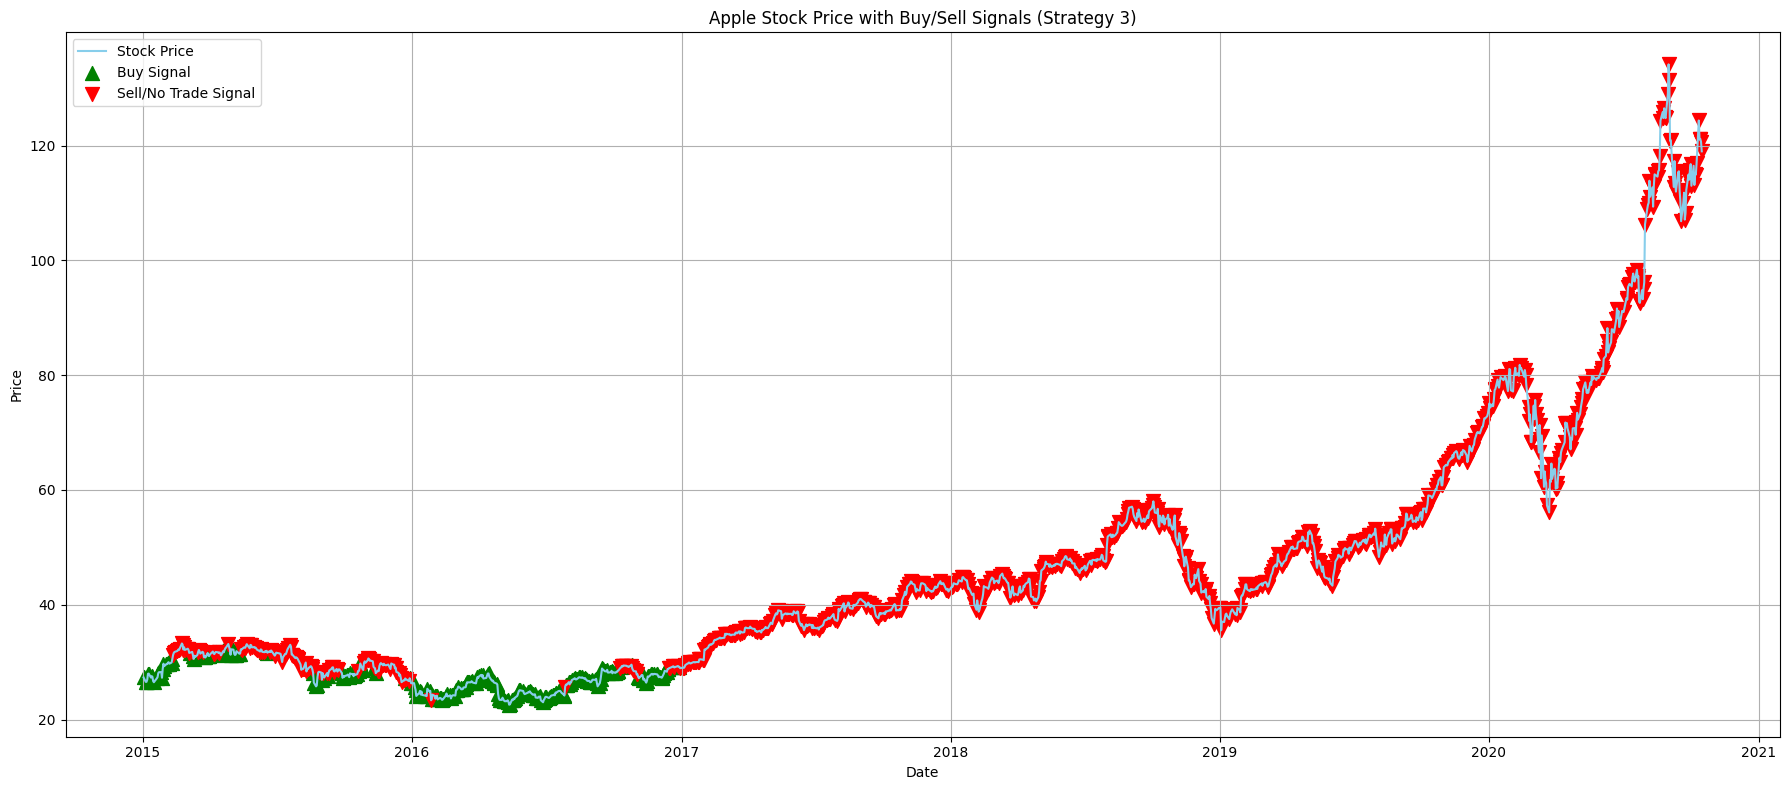

Generated plot of stock price with buy/sell signals for Strategy 3.


In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.plot(df_test_3_copy['Date'], df_test_3_copy['Price'], label='Stock Price', color='skyblue')

# Overlay buy signals (Predicted_Direction == 1)
buy_signals_3 = df_test_3_copy[df_test_3_copy['Predicted_Direction'] == 1]
plt.scatter(buy_signals_3['Date'], buy_signals_3['Price'], marker='^', color='green', s=100, label='Buy Signal')

# Overlay sell signals (Predicted_Direction == 0)
sell_signals_3 = df_test_3_copy[df_test_3_copy['Predicted_Direction'] == 0]
plt.scatter(sell_signals_3['Date'], sell_signals_3['Price'], marker='v', color='red', s=100, label='Sell/No Trade Signal')

plt.title('Apple Stock Price with Buy/Sell Signals (Strategy 3)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Generated plot of stock price with buy/sell signals for Strategy 3.")

**Reasoning**:
Now, I will create a separate line plot to visualize the 'Cumulative_PnL' for Strategy 3 over its testing period, as requested in the instructions. This will show the performance of the third trading strategy over time.



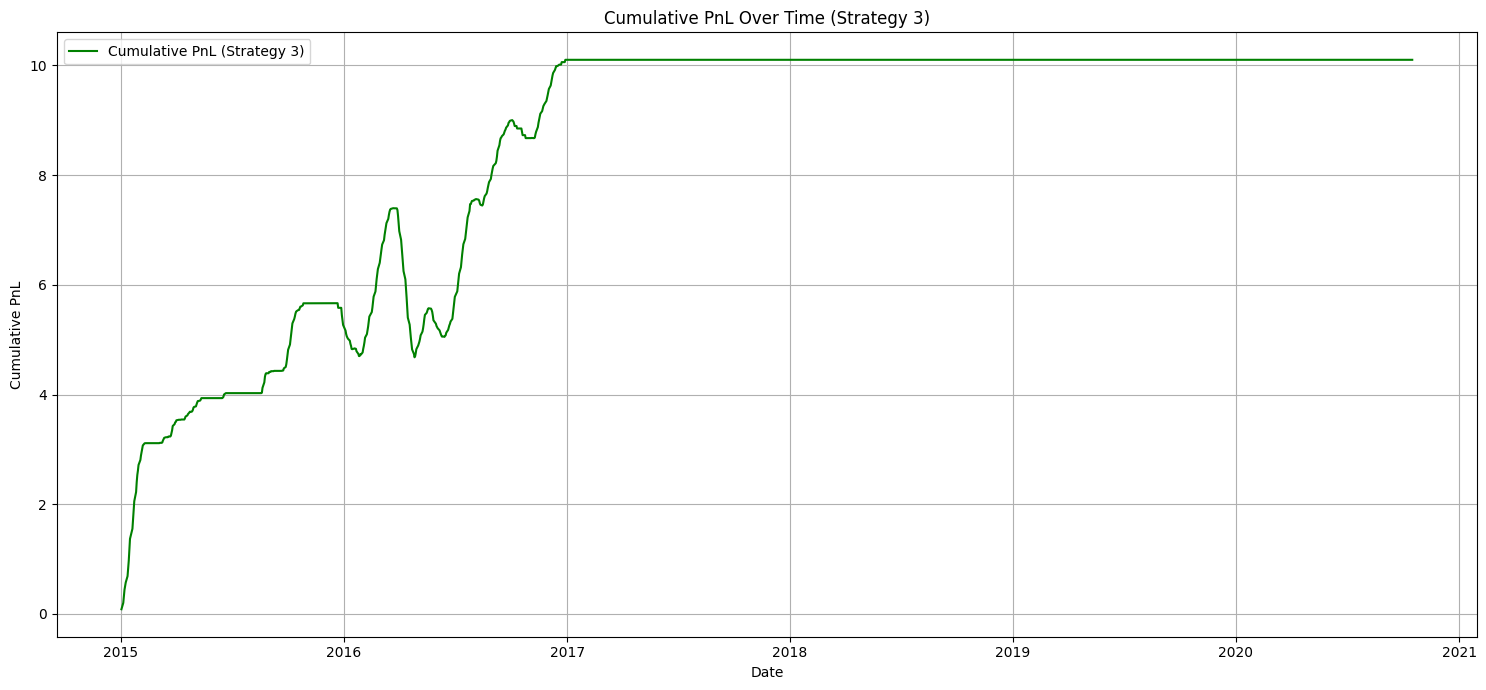

Generated plot of cumulative PnL for Strategy 3.


In [64]:
plt.figure(figsize=(15, 7))
plt.plot(df_test_3_copy['Date'], df_test_3_copy['Cumulative_PnL'], label='Cumulative PnL (Strategy 3)', color='green')
plt.title('Cumulative PnL Over Time (Strategy 3)')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("Generated plot of cumulative PnL for Strategy 3.")